In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy

from mpl_toolkits.mplot3d import Axes3D
import ROOT


In [3]:


uni = "khu_test_64f_8h_500n_5l_m" 
path = "/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/*"+uni +"*/*"+uni +".csv"
# path = "/home/chyoo/work/KNO_VRDL/result/old/20230920_SAVER_sortpmt_mse_light/20230920_SAVER_sortpmt_mse_light.csv"


pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

In [4]:
df = pd.read_csv(pred_list[0])

In [5]:
pred = np.array(df['prediction']).reshape(-1,3)
label = np.array(df['label']).reshape(-1,3)

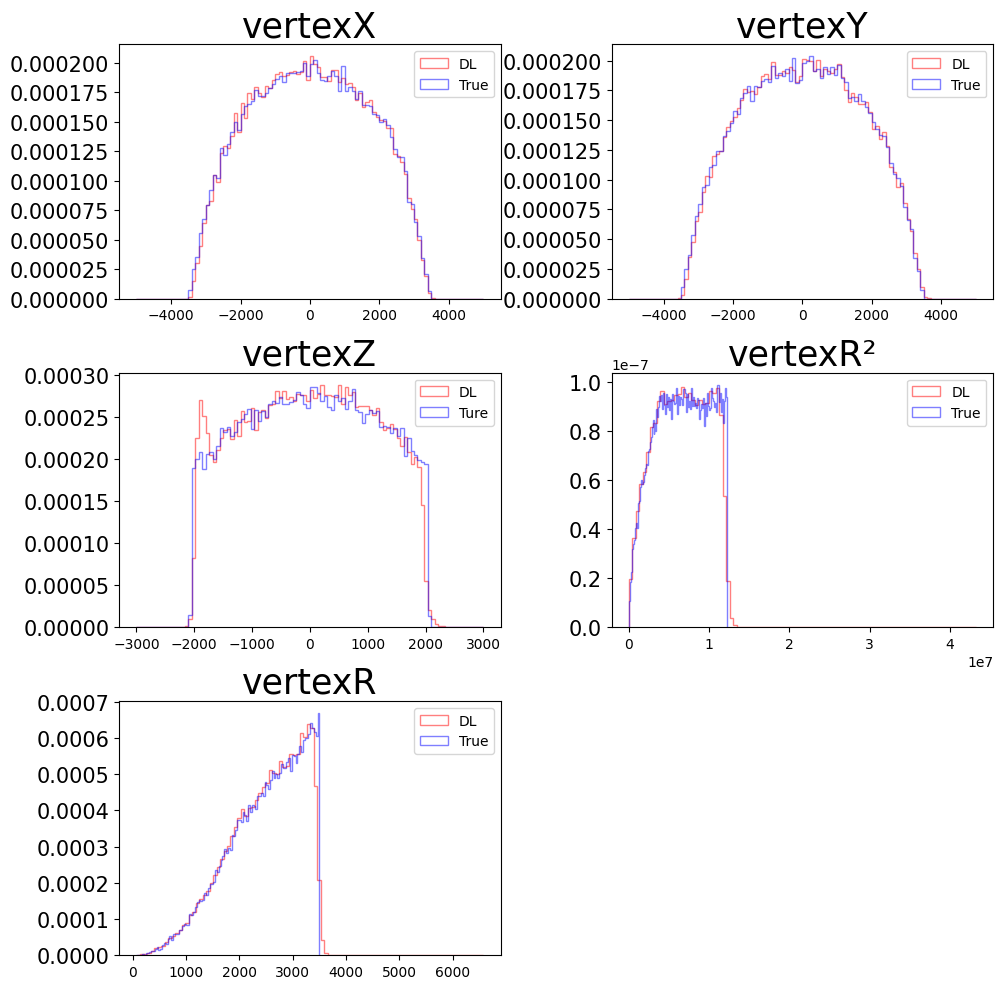

In [6]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplot(3,2,1)
plt.hist(pred[:,0], bins = 100, range = [-5000,5000], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,0], bins = 100, range = [-5000,5000], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')


plt.title('vertexX',fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)
# plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(3,2,2)
plt.hist(pred[:,1], bins = 100, range = [-5000,5000], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,1], bins = 100, range = [-5000,5000], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')

plt.title('vertexY',fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)
# plt.xlabel("m", fontsize=15, loc='right')
plt.legend()

plt.subplot(3,2,3)
plt.hist(pred[:,2], bins = 100, range = [-3000,3000], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,2], bins = 100, range = [-3000,3000], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'Ture')

plt.title('vertexZ',fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)
# plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(3,2,4)
plt.hist((pred[:,0]**2+pred[:,1]** 2+pred[:,2]** 2), bins = 100, color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist((label[:,0]**2+label[:,1]**2+label[:,2]**2), bins = 100, color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')

plt.title('vertexR\u00b2',fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)
# plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(3,2,5)
plt.hist(np.sqrt((pred[:,0]**2+pred[:,1]** 2+pred[:,2]** 2)), bins = 100, color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(np.sqrt((label[:,0]**2+label[:,1]**2+label[:,2]**2)), bins = 100, color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')

plt.title('vertexR',fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)
# plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_2782101/1733807847.py:20: RuntimeWarning: divide by zero encountered in divide
  popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=pp, sigma=1./np.sqrt(hist_N), absolute_sigma=True)


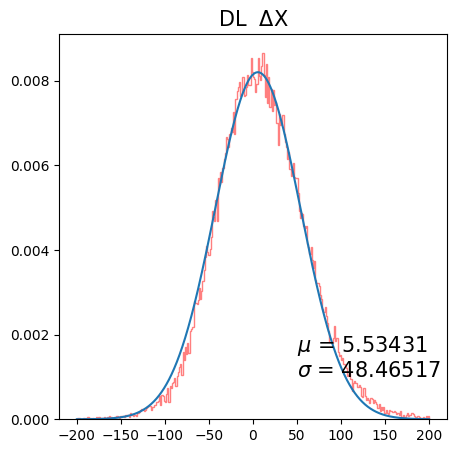

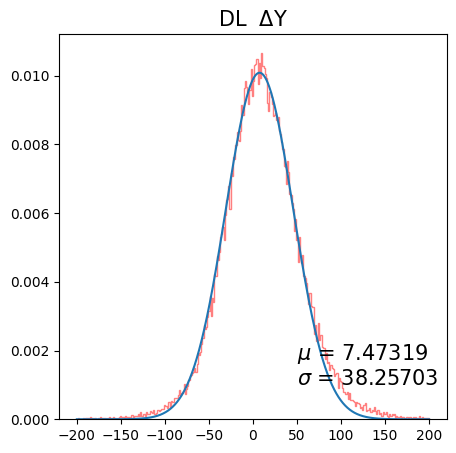

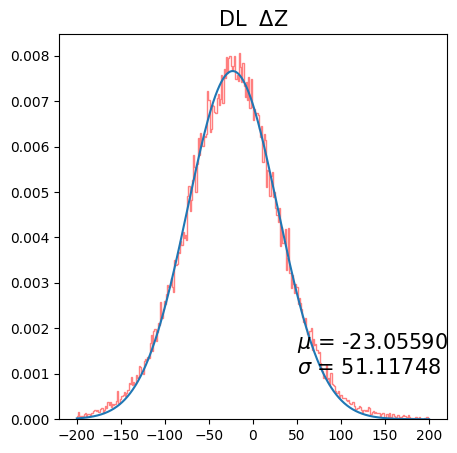

In [7]:

ran = 200
pp = [100,10,20]
vertexs = ['X','Y','Z']
bins = 300
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f

plt.rcParams['figure.figsize'] = (5, 5)
for vertex in range(3):
    # plt.subplot(3,1,vertex+1)
    tmp_hist = plt.hist(pred[:,vertex] - label[:,vertex],bins = bins, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=pp, sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/bins)
    A = popt[0]; mu = popt[1]; sigma = popt[2]

    plt.title('DL  ' + r'$\Delta$'+vertexs[vertex],fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    # plt.xlabel("??", fontsize=10, loc='right')

    plt.text(50,0.001,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
    plt.show()



/tmp/ipykernel_2782101/2216406834.py:27: RuntimeWarning: divide by zero encountered in divide
  popt, pcov = curve_fit(gaussian, hist_x[(hist_x>x_min) & (hist_x<x_max)], hist_N[(hist_x>x_min) & (hist_x<x_max)], p0=pp, sigma=1./np.sqrt(hist_N[(hist_x>x_min) & (hist_x<x_max)]), absolute_sigma=True)


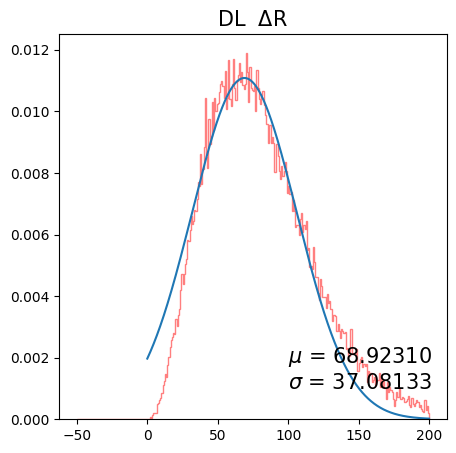

In [11]:


pp = [50,10,20]

bins = 300
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f

x_min = 0
x_max = 200

all_hist = (pred[:,0] - label[:,0])**2+(pred[:,1] - label[:,1])**2+(pred[:,2] - label[:,2])**2
# cut_hist = all_hist[(all_hist>20) & (all_hist<70)]



plt.rcParams['figure.figsize'] = (5, 5)

# plt.subplot(3,1,vertex+1)
tmp_hist = plt.hist(np.sqrt(all_hist),bins = bins, range = [-50,200], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x[(hist_x>x_min) & (hist_x<x_max)], hist_N[(hist_x>x_min) & (hist_x<x_max)], p0=pp, sigma=1./np.sqrt(hist_N[(hist_x>x_min) & (hist_x<x_max)]), absolute_sigma=True)
hist_xx = np.arange(x_min,x_max,0.6/bins)
A = popt[0]; mu = popt[1]; sigma = popt[2]

plt.title('DL  ' + r'$\Delta$'+'R',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
# plt.xlabel("??", fontsize=10, loc='right')

plt.text(100,0.001,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.show()
